In [529]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

# Point 1

# a)

In [530]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    size = x.shape[0]
    s = np.arange(size)
    k = s.reshape((size, 1))
    e = np.exp(-2j * np.pi * k * s / size)
    return np.dot(e, x)


def cos_signal(f):
    w = 2*np.pi*f
    cos_func = lambda t: np.cos(t*w)
    return cos_func
    

def make_signal(func, start, end, step, A=3):
    time = np.arange(start, end, step)
    signal_val = np.array([A*func(t) for t in time])
    return signal_val, time

In [531]:
cos50  = cos_signal(f=50)
cos150 = cos_signal(f=150)

cos50_signal,  time50  = make_signal(cos50,  start=0, end=0.2, step=0.001)
cos150_signal, time150 = make_signal(cos150, start=0, end=0.2,   step=0.001)

In [532]:
count = 100

fft50_time  = timeit(lambda: np.fft.fft(cos50_signal),  number=count)
fft150_time = timeit(lambda: np.fft.fft(cos150_signal), number=count)

dft50_time  = timeit(lambda: DFT_slow(cos50_signal),  number=count)
dft150_time = timeit(lambda: DFT_slow(cos150_signal), number=count)

print(f"""fft ({count} times): 
      50hz:  {fft50_time:.4f} sec 
      150hz: {fft150_time:.4f} sec\n""")

print(f"""DFT_slow ({count} times):  
      50hz:  {dft50_time:.4f} sec 
      150hz: {dft150_time:.4f} sec\n""")

print(f"fft is {dft50_time / fft50_time:.1f} times faster then dft at 50hz")
print(f"fft is {dft150_time/fft150_time:.1f} times faster then dft at 150hz")

fft (100 times): 
      50hz:  0.0017 sec 
      150hz: 0.0005 sec

DFT_slow (100 times):  
      50hz:  0.2693 sec 
      150hz: 0.2490 sec

fft is 159.8 times faster then dft at 50hz
fft is 533.5 times faster then dft at 150hz


<function matplotlib.pyplot.show(close=None, block=None)>

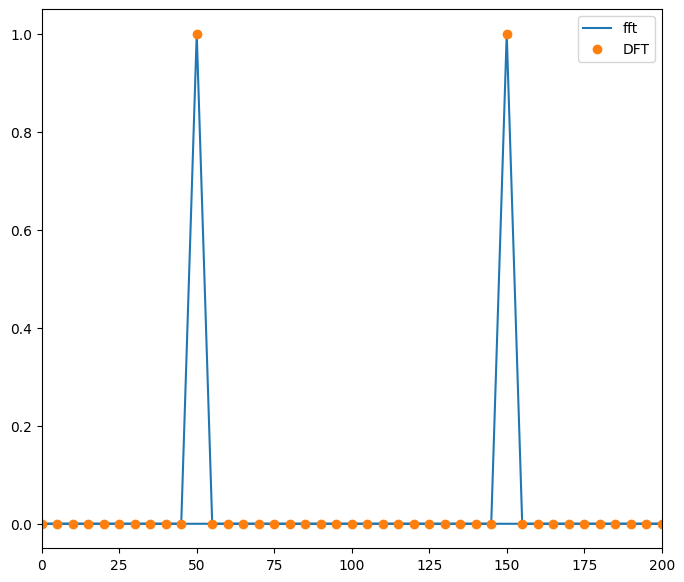

In [533]:
main_signal = cos50_signal + cos150_signal

fig = plt.figure(figsize=(8, 7))

a = np.fft.fft(main_signal)
b = DFT_slow(main_signal)

xf = np.fft.fftfreq(a.shape[0], 0.001)

plt.xlim(0, 200)
plt.plot(xf, a/np.max(a), label="fft")
plt.plot(xf, b/np.max(b), marker="o", label="DFT", linestyle="none")
# plt.plot(a/np.max(a), label="fft")
# plt.plot(b/np.max(b)+1, label="DFT")
plt.legend()
plt.show

# б)

In [534]:
spectrum_fft  = np.fft.fft(main_signal)

ifft_signal  = np.asarray(np.fft.ifft(spectrum_fft),  float)

C:\Users\4xev4\AppData\Local\Temp\ipykernel_7160\2636437616.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  ifft_signal  = np.asarray(np.fft.ifft(spectrum_fft),  float)


Text(0, 0.5, 'Амплитуда')

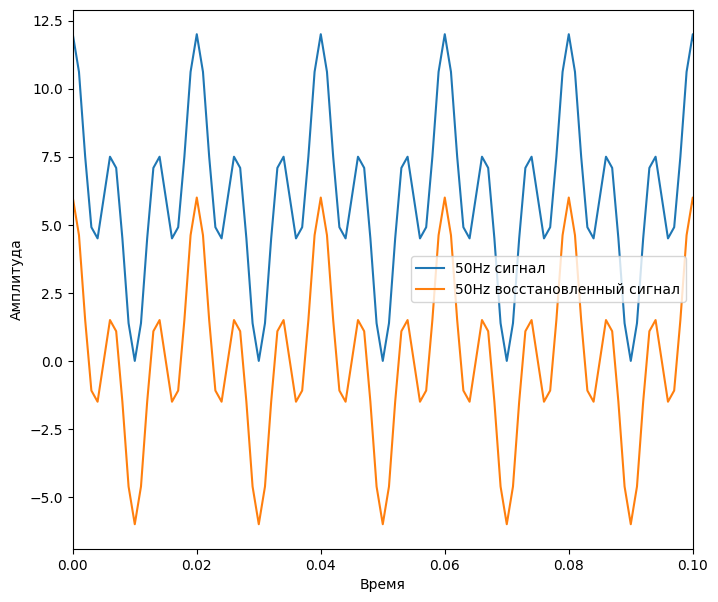

In [535]:
fig = plt.figure(figsize=(8, 7))
plt.subplots_adjust(wspace=0.1, hspace=0.1)


plt.xlim(0, 0.1)
plt.plot(time150, main_signal+6, label="50Hz сигнал")
plt.plot(time150, ifft_signal,   label="50Hz восстановленный сигнал")
plt.legend()
plt.xlabel("Время")
plt.ylabel("Амплитуда")

# в)

In [536]:
noise50  = np.random.normal(0, 1, cos50_signal.shape)
noise150 = np.random.normal(0, 1, cos150_signal.shape)

noised50_signal  = noise50 + cos50_signal
noised150_signal = noise150 + cos150_signal

noised_spectrum50  = np.fft.fft(noised50_signal)
noised_spectrum150 = np.fft.fft(noised150_signal)

restored_noised50_signal  = np.asarray(np.fft.ifft(noised_spectrum50),  float)
restored_noised150_signal = np.asarray(np.fft.ifft(noised_spectrum150), float)

C:\Users\4xev4\AppData\Local\Temp\ipykernel_7160\1811563188.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_noised50_signal  = np.asarray(np.fft.ifft(noised_spectrum50),  float)
C:\Users\4xev4\AppData\Local\Temp\ipykernel_7160\1811563188.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_noised150_signal = np.asarray(np.fft.ifft(noised_spectrum150), float)


[]

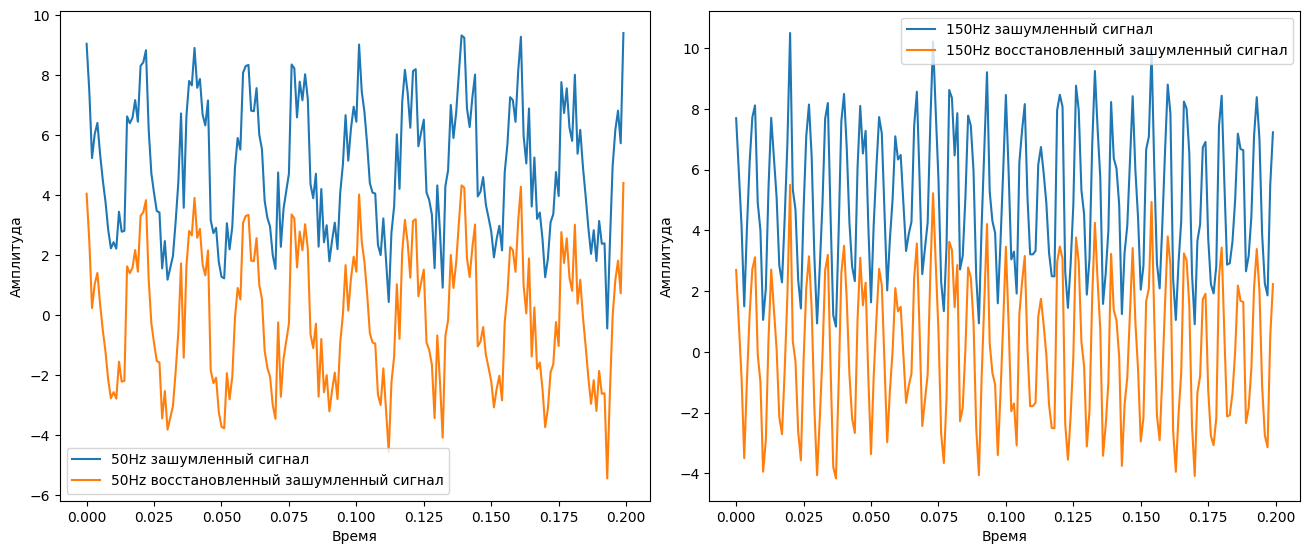

In [537]:
fig = plt.figure(figsize=(16, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(time50, noised50_signal+5,          label="50Hz зашумленный сигнал")
plt.plot(time50, restored_noised50_signal, label="50Hz восстановленный зашумленный сигнал")
plt.legend()
plt.xlabel("Время")
plt.ylabel("Амплитуда")

plt.subplot(222)
plt.plot(time150, noised150_signal+5,          label="150Hz зашумленный сигнал")
plt.plot(time150, restored_noised150_signal, label="150Hz восстановленный зашумленный сигнал")
plt.legend()
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.plot()


# Point 2

In [538]:
def rec_impulse_func(A, T):
    def _rec_pulse(t):
        t = np.floor(t)
        if t % T == 0:
            return A
        else:
            return 0
    return _rec_pulse

In [539]:
rec_signal_func = rec_impulse_func(A=5, T=2)

rec_signal, time_rec = make_signal(rec_signal_func, start=0, end=4, step=0.01)

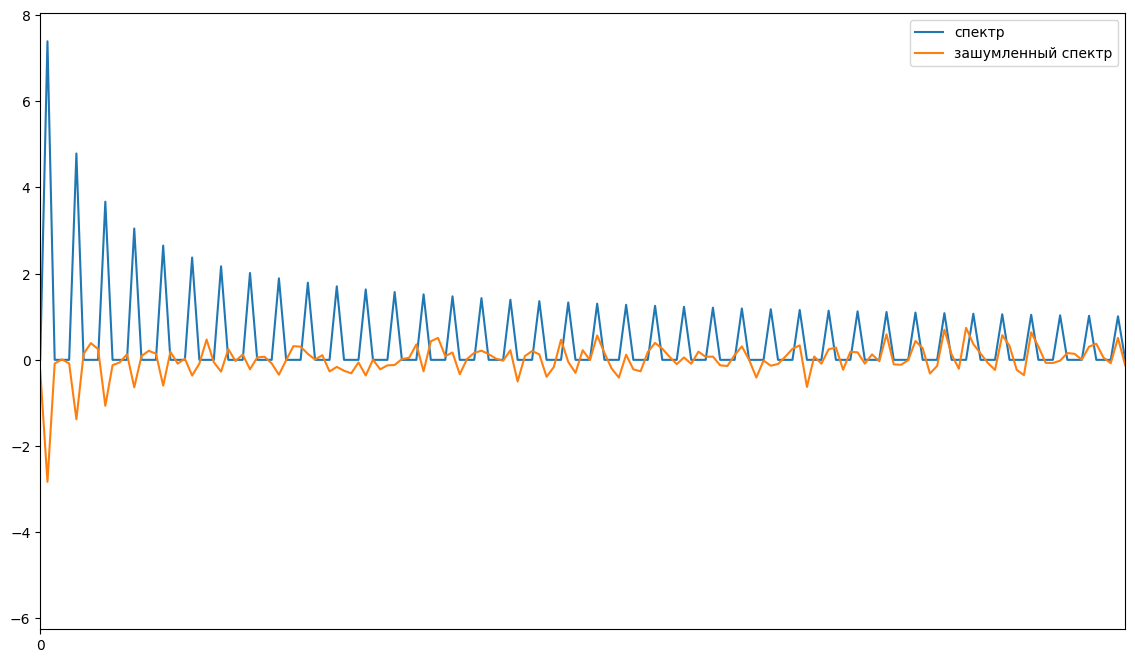

In [540]:
noise = np.random.normal(0, 1, rec_signal.shape)

noised_signal = rec_signal + noise

spectrum_impulse_fft = np.fft.fft(rec_signal)[5:-5]
spectrum_impulse_dft = DFT_slow(rec_signal)[5:-5]
noised_impulse_fft   = np.fft.fft(noised_signal)[5:-5]

fig = plt.figure(figsize=(14, 8))

plt.xlim(0, 150)
plt.plot(spectrum_impulse_fft/np.max(spectrum_impulse_fft), label="спектр")
plt.plot(noised_impulse_fft/np.max(noised_impulse_fft),     label="зашумленный спектр")
plt.legend()
plt.xticks([0])
plt.show()

In [541]:
def FFT(signal):
    _signal = np.asarray(signal, dtype=float)
    N = _signal.shape[0]
    
    n = np.arange(N)
    k = n.reshape(-1, 1)

    M = np.exp(-2j * np.pi * n * k / N)
    spectrum = np.dot(M, _signal.reshape(N, -1))

    while spectrum.shape[0] < N:
        spectrum_even = spectrum[:, :spectrum.shape[1]//2]
        spectrum_odd  = spectrum[:, spectrum.shape[1]//2:]
        factor   = np.exp(-1j * np.pi * np.arange(spectrum.shape[0]) / spectrum.shape[0]).reshape(-1, 1)
        spectrum = np.vstack([spectrum_even+factor*spectrum_odd, spectrum_even-factor*spectrum_odd])

    return spectrum.reshape(-1)

In [542]:
np.allclose(FFT(cos150_signal), np.fft.fft(cos150_signal))

True

In [543]:
cos50_signal, time50 = make_signal(cos50, start = 0, end=0.3, step=0.01)

runs_count = 100

spectrum_fft_50_time = timeit(lambda: np.fft.fft(cos50_signal), number=runs_count)
spectrum_fft_50 = np.fft.fft(cos50_signal)

spectrum_FFT_50_time = timeit(lambda: FFT(cos50_signal), number=runs_count)
spectrum_FFT_50 = FFT(cos50_signal)

print(f"""np.fft ({runs_count} times):
      50hz: {spectrum_fft_50_time:.4f} sec""")
print(f"""FFT ({runs_count} times):
      50hz: {spectrum_FFT_50_time:.4f} sec""")
print(f"np.fft is {spectrum_FFT_50_time/spectrum_fft_50_time:.4f} times faster")

np.fft (100 times):
      50hz: 0.0009 sec
FFT (100 times):
      50hz: 0.0059 sec
np.fft is 6.7575 times faster


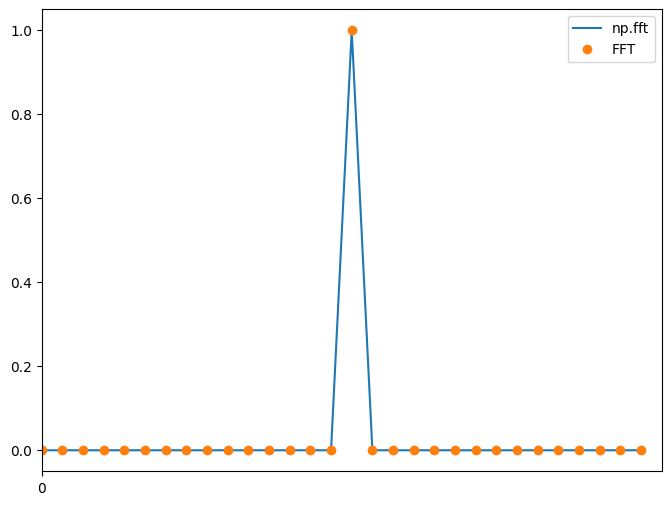

In [544]:
fig = plt.figure(figsize=(8, 6))

a = spectrum_fft_50
b = spectrum_FFT_50

xf = np.fft.fftfreq(a.shape[0], 0.001)

plt.xlim(20, 30)
plt.plot(a/np.max(a), label="np.fft")
plt.plot(b/np.max(b), marker="o", linestyle="none", label="FFT")
plt.xticks([0])
plt.legend()
plt.show()